In [55]:
import math
import osmnx as ox
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
ox.config(log_console=True)

name = "Piedmont, California, USA"
name = "Munich, Bavaria, Germany"
G = ox.graph_from_place(name, network_type="walk")
Gp = ox.project_graph(G)

In [73]:
# G.nodes(data=True)
# G.nodes()

In [3]:
tags = {"amenity" : ["charging_station"]}#, "bench"]}

gdf = ox.geometries_from_place(name, tags)
display(gdf.columns)
gdf.to_excel("charge.xlsx")
gdf = gdf[["capacity", "network", "operator", "geometry", "voltage"]].copy()
display(gdf)
gdf.to_excel("charge_filter.xlsx")
centroids = gdf["geometry"]
X = centroids.x
Y = centroids.y

display(X, Y)

Index(['amenity', 'capacity', 'fee', 'network', 'opening_hours', 'operator',
       'payment:coins', 'payment:debit_cards', 'ref', 'geometry', 'addr:city',
       'addr:country', 'addr:housenumber', 'addr:postcode', 'addr:street',
       'amperage', 'socket:type2', 'source', 'source:delivery_date', 'voltage',
       'authentication:membership_card', 'description', 'manufacturer',
       'motorcar', 'name', 'socket:schuko', 'website', 'fixme',
       'authentication:nfc', 'authentication:none', 'car', 'access',
       'capacity:car', 'socket:type2_combo', 'scooter', 'layer', 'level',
       'note', 'covered', 'bicycle', 'service:bicycle:charging',
       'service:bicycle:pump', 'socket:schuko:current', 'socket:type2:output',
       'contact:phone', 'contact:website', 'socket:chademo',
       'socket:chademo:output', 'socket:type2_combo:output',
       'capacity:charging', 'description:en', 'truck', 'wheelchair', 'cars',
       'trucks', 'authentication:app', 'parking:fee', 'check_date',

capacity      network            operator  \
element_type osmid                                                  
node         401301237         2  ladenetz.de       Stadt München   
             1271358134      NaN          NaN                 NaN   
             1330522157      NaN          NaN                E.On   
             1475946405        2          NaN  Stadtwerke München   
             1895124498        2          NaN                EnBW   
...                          ...          ...                 ...   
             8833385990        2  ladenetz.de  Stadtwerke München   
             8848438840        2          NaN                 SWM   
             8849922543      NaN          NaN                 SWM   
             8901463916       22          NaN  Stadtwerke München   
             8911720469        2          NaN          C. Erbguth   

                                          geometry voltage  
element_type osmid                                          
node         401301237   POINT (11.57398 48.15893)     NaN  
             1271358134  POINT (11.68969 48.13300)     400  
             1330522157  POINT (11.54603 48.13266)     NaN  
             1475946405  POINT (11.53757 48.15324)     NaN  
             1895124498  POINT (11.52806 48.13335)     NaN  
...                                            ...     ...  
             8833385990  POINT (11.61133 48.08921)     NaN  
             8848438840  POINT (11.60146 48.10392)     NaN  
             8849922543  POINT (11.56417 48.19265)     NaN  
             8901463916  POINT (11.60902 48.14158)     NaN  
             8911720469  POINT (11.54965 48.18512)     NaN  

[548 rows x 5 columns]

element_type  osmid     
node          401301237     11.573982
              1271358134    11.689693
              1330522157    11.546030
              1475946405    11.537567
              1895124498    11.528061
                              ...    
              8833385990    11.611329
              8848438840    11.601462
              8849922543    11.564174
              8901463916    11.609020
              8911720469    11.549647
Length: 548, dtype: float64

element_type  osmid     
node          401301237     48.158934
              1271358134    48.133001
              1330522157    48.132657
              1475946405    48.153236
              1895124498    48.133347
                              ...    
              8833385990    48.089211
              8848438840    48.103921
              8849922543    48.192651
              8901463916    48.141579
              8911720469    48.185121
Length: 548, dtype: float64

In [66]:
nn = ox.nearest_nodes(G, X, Y)
print(len(nn))
print(len(set(nn)))
print(nn)

548
426
[1249710076, 183888004, 2976471445, 2948527671, 1689285187, 3580259845, 715297377, 2787252813, 1524550964, 1343582127, 33840508, 287163419, 2647411839, 2065700148, 498742998, 3231729972, 4252092769, 4076257455, 4119415210, 6221755143, 1479308038, 3792289515, 319908699, 1813122608, 1243819196, 1316261799, 4161744589, 4161744589, 4119415210, 4119415210, 4119415210, 3619392724, 9004670632, 634139523, 4232410704, 2057657715, 1357218908, 2057657715, 1088828115, 7093404488, 3810555592, 8122578776, 8122578776, 1387117359, 521728258, 2830321088, 660801347, 641886776, 387446342, 4428064432, 3528517117, 1349924670, 1349924670, 259827898, 3575982472, 1290733048, 5156040713, 3812483537, 3812483537, 1042772363, 36645569, 4016876498, 5159797495, 5159797495, 5159797493, 5159797493, 5159797494, 277064815, 420150662, 1132176078, 1132176078, 7963856886, 293729469, 4209636462, 2041308, 1725999048, 2072498330, 2041308, 3070745885, 2072498330, 27213157, 3992074258, 295283221, 372827505, 372827505, 

In [5]:
H = G.subgraph(nn)
display(H.nodes)

nodes = ox.graph_to_gdfs(H, edges=False)
display(nodes.head())

NodeView((5156040713, 7660226572, 3363334156, 3992074258, 66951190, 1455802391, 3759740960, 3901384741, 2727569464, 660736057, 1252307006, 4442986566, 6521874514, 1673693266, 5250373720, 1138948189, 2622091359, 2329213041, 6521874549, 26007670, 1746118777, 348055676, 17197186, 183888004, 3792812165, 2624817291, 2072498330, 1237301404, 8868040869, 4076257455, 259827898, 1705279674, 3009149115, 564179134, 201738432, 1078698180, 20834529, 278778081, 6653169892, 7983334, 5696581869, 345542899, 3420350708, 4515973368, 3523424507, 521728258, 7197462799, 2151151893, 2381584667, 1956133, 1649453350, 1410849065, 1410849069, 4738777396, 3231729972, 440628, 4538145078, 21563705, 4708036923, 325847355, 442665281, 4567210307, 1577486662, 630794576, 107997530, 4252092769, 1533294953, 2938118506, 2074855806, 8872395139, 3575982472, 1042772363, 506827156, 2976471445, 1038152086, 2042190228, 2203963796, 4523473317, 4119415210, 32962991, 352790970, 4758000064, 3109257667, 3809280461, 26057167, 713766344

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
5156040713,48.211045,11.593632,4,NaN,NaN,POINT (11.59363 48.21104)
7660226572,48.155479,11.427586,3,NaN,NaN,POINT (11.42759 48.15548)
3363334156,48.157051,11.539694,4,NaN,NaN,POINT (11.53969 48.15705)
3992074258,48.115558,11.525968,3,NaN,NaN,POINT (11.52597 48.11556)
66951190,48.183455,11.481243,4,NaN,NaN,POINT (11.48124 48.18346)


In [58]:
capacity = gdf["capacity"]
capacity = pd.to_numeric(capacity, downcast="integer")
print(capacity)

capacity = {node: int(val) if not math.isnan(val) else 1 for node, val in dict(capacity["node"]).items()}

element_type  osmid     
node          401301237      2.0
              1271358134     NaN
              1330522157     NaN
              1475946405     2.0
              1895124498     2.0
                            ... 
              8833385990     2.0
              8848438840     2.0
              8849922543     NaN
              8901463916    22.0
              8911720469     2.0
Name: capacity, Length: 548, dtype: float64


In [67]:
cap = {}
for i, node in enumerate(centroids["node"].index):
    node_new = nn[i]
    if node_new not in cap:
        cap[node_new] = capacity[node]
    else:
        cap[node_new] += capacity[node]
        
print(len(cap))

426


In [70]:
rand = list(G.nodes(data=True))[1000]
print(rand)

print(dict(G.nodes(data=True))[1955541])

x = rand[1]["x"]
y = rand[1]["y"]
print(x, y)
nc = ox.nearest_nodes(H, x, y)
print(nc)
T = G.subgraph([rand[0], nc])
display(T.nodes)

(1955541, {'y': 48.160871, 'x': 11.5633269, 'street_count': 4})
{'y': 48.160871, 'x': 11.5633269, 'street_count': 4}
11.5633269 48.160871
660736057


NodeView((660736057, 1955541))

In [7]:
route = ox.shortest_path(G, rand[0], nc, weight="length")
print(route)
route_len = nx.shortest_path_length(G, rand[0], nc, weight="length")
print(route_len)

[1955541, 3348494806, 3348495094, 3348495801, 2280854864, 3348495299, 27733777, 267150075, 267142816, 660735968, 660736043, 660736057]
333.71299999999997


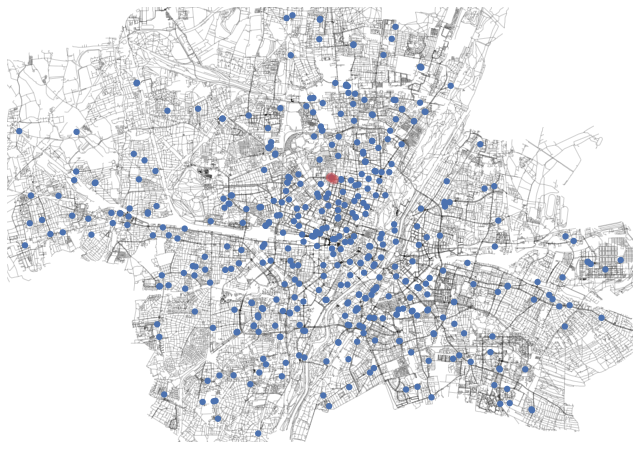

In [76]:
fig, ax = plt.subplots(figsize=(12, 8))

ox.plot_graph(G, ax=ax, node_size=0, edge_linewidth=1, edge_color="#262626", show=False, edge_alpha=0.1)
ox.plot_graph(H, ax=ax, node_size=40, edge_linewidth=0, node_color="#4C72B0", show=False)
# gdf.plot(ax=ax)
ox.plot_graph_route(G, route, ax=ax, route_color="#C44E52", route_linewidth=6, node_size=0)

# plt.savefig("figure.pdf", format="pdf", dpi=1000)

plt.show()

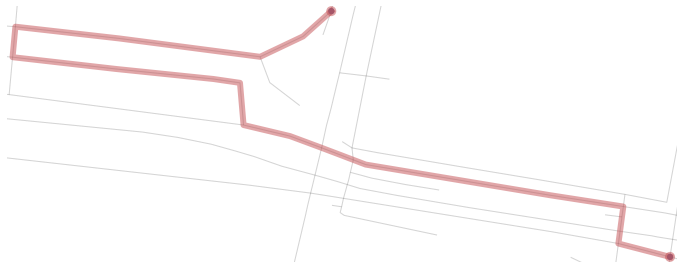

In [80]:
fig, ax = plt.subplots(figsize=(12, 8))

ox.plot_graph(G, ax=ax, node_size=0, edge_linewidth=1, edge_color="#262626", show=False, edge_alpha=0.1)
ox.plot_graph(T, ax=ax, node_size=40, edge_linewidth=0, node_color="#4C72B0", show=False, bbox=(48.16154624, 48.16085776, 11.563354262, 11.56065))
ox.plot_graph_route(G, route, ax=ax, route_color="#C44E52", route_linewidth=6, node_size=0, pg_kwargs={"show": False})

# print(ax.get_xbound())
# print(ax.get_ybound())

# plt.savefig("figure.pdf", format="pdf", dpi=1000)

plt.show()